<a href="https://colab.research.google.com/github/TruthTreeASD/ml/blob/apar/ASD_clustering1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

In [0]:
data = pd.read_csv('Cleaned_StateData_2.csv')
data.head()

,Year,ID,State_Code,County,State,FIPS_Code_State,FYEndDate,Population,Total_Revenue,Total_Rev_Own_Sources,...,Emp_Retire_Sec_Mortgages,Emp_Retire_Sec_Misc_Inv,Emp_Retire_Sec_Oth_Nong,Unemp_Comp_Cash___Sec,Unemp_Comp_Bal_In_US_Trs,Unemp_Comp_Other_Balance,Nonin_Trust_Cash___Sec,Sinking_Fd_Cash___Sec,Bond_Fd_Cash___Sec,Oth_Nonin_Fd_Cash___Sec
0,2016,10000000,1,0,ALABAMA,1,930,4858979,30172490,20650521,...,1815,0,4143961,529107,529107,0,12913490,1464402,176157,11272931
1,2016,20000000,2,0,ALASKA,2,630,738432,8060170,5206968,...,0,1145382,1867671,433220,433220,0,64944768,3662764,153822,61128182
2,2016,30000000,3,0,ARIZONA,4,630,6828065,38241052,23700590,...,0,6111807,1821970,322017,322017,0,18794165,5809405,429626,12555134
3,2016,40000000,4,0,ARKANSAS,5,630,2978204,21431620,14000079,...,4142,10936752,3783960,485792,485792,0,8608523,1664378,358939,6585206
4,2016,50000000,5,0,CALIFORNIA,6,630,39144818,322332307,227996024,...,5927,17058534,103383571,-3088756,11711,-3100467,107409539,29880672,5039254,72489613


In [0]:
keys = data.keys().tolist()
keys

['Year',
 'ID',
 'State_Code',
 'County',
 'State',
 'FIPS_Code_State',
 'FYEndDate',
 'Population',
 'Total_Revenue',
 'Total_Rev_Own_Sources',
 'General_Revenue',
 'Gen_Rev_Own_Sources',
 'Total_Taxes',
 'Property_Tax',
 'Tot_Sales___Gr_Rec_Tax',
 'Total_Gen_Sales_Tax',
 'Total_Select_Sales_Tax',
 'Alcoholic_Beverage_Tax',
 'Amusement_Tax',
 'Insurance_Premium_Tax',
 'Motor_Fuels_Tax',
 'Pari_mutuels_Tax',
 'Public_Utility_Tax',
 'Tobacco_Tax',
 'Other_Select_Sales_Tax',
 'Total_License_Taxes',
 'Alcoholic_Beverage_Lic',
 'Amusement_License',
 'Corporation_License',
 'Hunting___Fishing_License',
 'Motor_Vehicle_License',
 'Motor_Veh_Oper_License',
 'Motor_Vehicle_License_Total',
 'Public_Utility_License',
 'Occup_and_Bus_Lic_NEC',
 'Other_License_Taxes',
 'Total_Income_Taxes',
 'Individual_Income_Tax',
 'Corp_Net_Income_Tax',
 'Death_and_Gift_Tax',
 'Docum_and_Stock_Tr_Tax',
 'Severance_Tax',
 'Taxes_NEC',
 'Total_IG_Revenue',
 'Total_Fed_IG_Revenue',
 'Fed_IGR_Air_Transport',
 'Fed_

In [0]:
[key for key in keys if 'revenue' in key.lower()]

['Total_Revenue',
 'General_Revenue',
 'Total_IG_Revenue',
 'Total_Fed_IG_Revenue',
 'Total_State_IG_Revenue',
 'Misc_General_Revenue',
 'Interest_Revenue',
 'Net_Lottery_Revenue',
 'Liquor_Stores_Revenue',
 'Total_Utility_Revenue',
 'Water_Utility_Revenue',
 'Unemp_Int_Revenue']

In [0]:
df = data[['Year', 'State', 'Population', 'General_Revenue', 'Interest_Revenue']]
df.head()

,Year,State,Population,General_Revenue,Interest_Revenue
0,2016,ALABAMA,4858979,25288886,180052
1,2016,ALASKA,738432,7628651,696560
2,2016,ARIZONA,6828065,34582961,607416
3,2016,ARKANSAS,2978204,20346096,136997
4,2016,CALIFORNIA,39144818,282907926,2060838


In [0]:
pivoted = df.pivot_table(index='State', columns='Year', values='General_Revenue')
pivoted = pivoted.sort_index()
pivoted

Year,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
State,,,,,,,,,,,,,,,,,,,,,
ALABAMA,2649994,2942390,3292526,3633716,4550927,4155165,4405328,5318865,5552342,5717701,...,20898228,21306140,21103234,23224028,23273238,22226197,22758547,22948381,24624640,25288886
ALASKA,1220263,1147198,1508307,3011436,4867003,5582926,4870752,5024981,5453073,5443686,...,10582079,16182604,11531688,11042685,12665675,14324470,12280315,10436363,7162449,7628651
ARIZONA,1728677,1992217,2274064,2566150,2775904,2890258,3104344,3761516,4292969,4604929,...,26192089,26534908,25547876,26844746,28465777,28510923,29501502,29690008,31212866,34582961
ARKANSAS,1395087,1660370,1798298,2102719,2227779,2239304,2355032,2626742,2924958,3171659,...,14161006,14758555,15210774,16501745,17431168,17124473,17310068,18058204,19379762,20346096
CALIFORNIA,20714820,23845651,25067583,29603059,32623137,34420723,34972478,40432273,46046986,50233596,...,187204219,192428706,186207795,198949318,213671478,199358854,219692720,230741509,265437320,282907926
COLORADO,2001520,2240264,2554408,2791974,2903689,3174292,3253266,3833095,4136777,4549639,...,18172637,19617888,18857772,19336002,21976630,21883601,23129280,24739273,28853198,27554624
CONNECTICUT,2318535,2546524,2827675,3110767,3449461,3849355,4158575,4929803,5729187,6363783,...,20730949,21416334,21079172,21984757,23770909,24508075,25446414,25845190,26635794,26171704
DELAWARE,635961,734618,806511,892558,997952,1065586,1165516,1328390,1544009,1520992,...,6336322,6555960,6693422,7226871,7338862,7350589,7793920,7576360,7573457,7962885
FLORIDA,4847077,5620613,6298323,7303596,8063292,8337735,9056548,10322378,11852177,13319466,...,69155488,71467243,66733795,70445079,74366596,72076083,73936835,77778332,79487553,80261324


In [0]:
pivoted.index

Index(['ALABAMA', 'ALASKA', 'ARIZONA', 'ARKANSAS', 'CALIFORNIA', 'COLORADO',
       'CONNECTICUT', 'DELAWARE', 'FLORIDA', 'GEORGIA', 'HAWAII', 'IDAHO',
       'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'KENTUCKY', 'LOUISIANA',
       'MAINE', 'MARYLAND', 'MASSACHUSETTS', 'MICHIGAN', 'MINNESOTA',
       'MISSISSIPPI', 'MISSOURI', 'MONTANA', 'NEBRASKA', 'NEVADA',
       'NEW HAMPSHIRE', 'NEW JERSEY', 'NEW MEXICO', 'NEW YORK',
       'NORTH CAROLINA', 'NORTH DAKOTA', 'OHIO', 'OKLAHOMA', 'OREGON',
       'PENNSYLVANIA', 'RHODE ISLAND', 'SOUTH CAROLINA', 'SOUTH DAKOTA',
       'TENNESSEE', 'TEXAS', 'UTAH', 'VERMONT', 'VIRGINIA', 'WASHINGTON',
       'WASHINGTON DC CITY', 'WEST VIRGINIA', 'WISCONSIN', 'WYOMING'],
      dtype='object', name='State')

In [0]:
nbrs = NearestNeighbors(n_neighbors=3, algorithm='auto').fit(pivoted)

In [0]:
distances, indices = nbrs.kneighbors(pivoted)

In [0]:
indices

array([[ 0, 16, 39],
       [ 1, 48, 47],
       [ 2, 41, 24],
       [ 3, 23, 14],
       [ 4, 31, 42],
       [ 5, 36, 39],
       [ 6, 16,  0],
       [ 7, 11, 38],
       [ 8, 37, 12],
       [ 9, 45, 46],
       [10, 47, 26],
       [11,  7, 38],
       [12, 34, 21],
       [13, 19, 49],
       [14, 23,  3],
       [15, 30, 43],
       [16,  0,  6],
       [17, 41, 24],
       [18, 26, 38],
       [19, 13, 22],
       [20, 32, 45],
       [21, 34, 29],
       [22, 46, 19],
       [23,  3, 14],
       [24, 41,  6],
       [25, 28, 44],
       [26, 18, 10],
       [27, 10, 47],
       [28, 25, 44],
       [29, 21, 34],
       [30, 15, 43],
       [31, 42,  8],
       [32, 20, 45],
       [33, 44, 50],
       [34, 12, 21],
       [35, 14, 23],
       [36,  5, 39],
       [37, 12,  8],
       [38,  7, 11],
       [39,  0, 16],
       [40, 44, 50],
       [41, 24,  2],
       [42,  8, 37],
       [43, 30, 15],
       [44, 50, 25],
       [45,  9, 46],
       [46, 22,  9],
       [47, 1

In [0]:
#0, 16, 39
pivoted.iloc[[0, 16, 39]]

Year,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
State,,,,,,,,,,,,,,,,,,,,,
ALABAMA,2649994,2942390,3292526,3633716,4550927,4155165,4405328,5318865,5552342,5717701,...,20898228,21306140,21103234,23224028,23273238,22226197,22758547,22948381,24624640,25288886
KENTUCKY,2650503,3044911,3465967,3743692,4031314,4251541,4522808,4825781,5396063,5706009,...,20058220,20837802,21471911,22862247,23568375,22574396,22926606,25268291,26633530,28198449
SOUTH CAROLINA,2041136,2351026,2644359,2905665,3236039,3343611,3642319,3969209,4544945,4950534,...,20275961,20236860,20692924,21442119,22791506,21269235,22160859,23076006,24708368,24904905


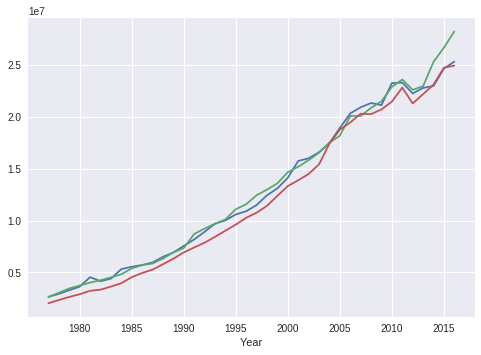

In [0]:
pivoted.iloc[0].plot()
pivoted.iloc[16].plot()
pivoted.iloc[39].plot()
plt.show()

In [0]:
pivoted.index[0]

'ALABAMA'

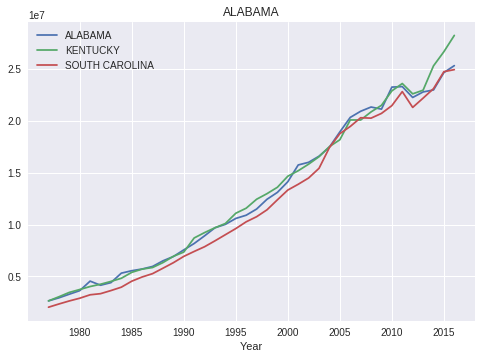

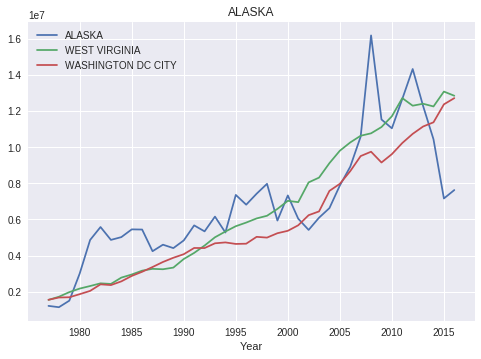

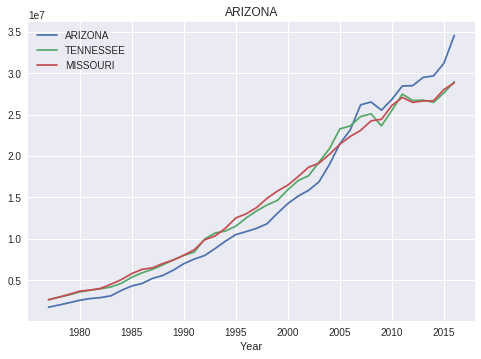

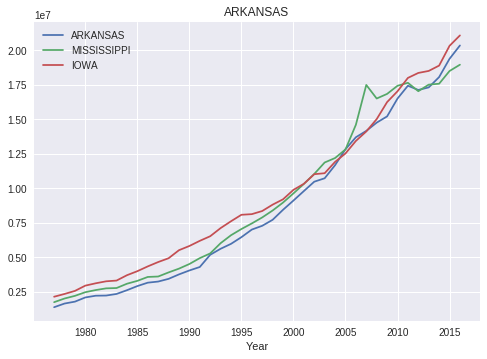

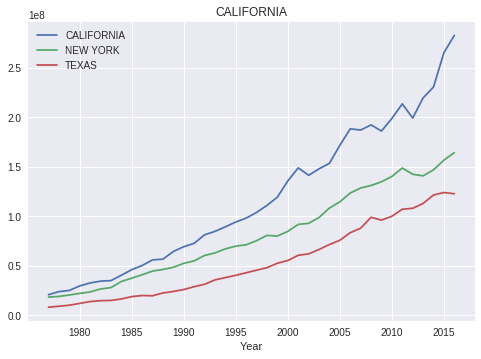

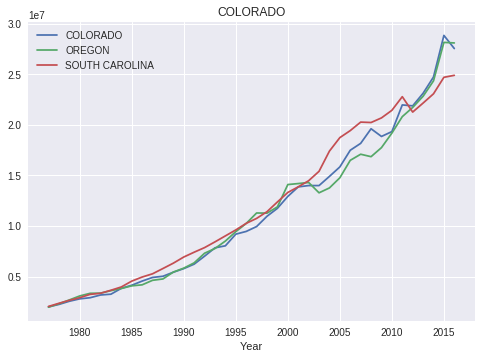

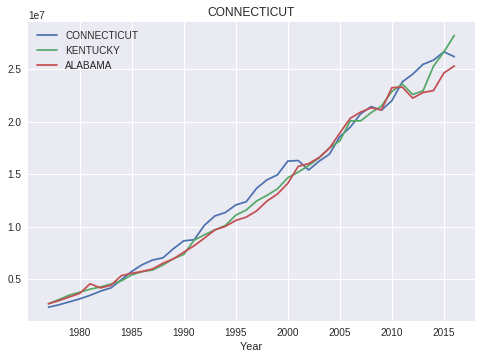

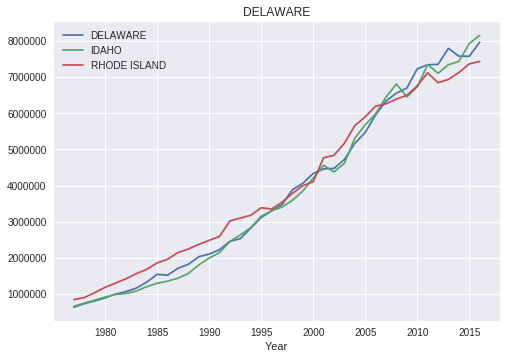

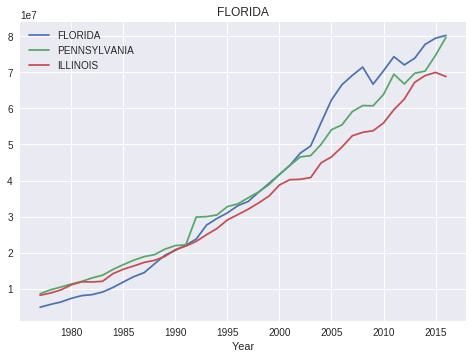

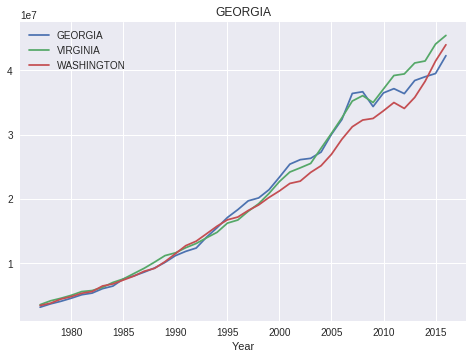

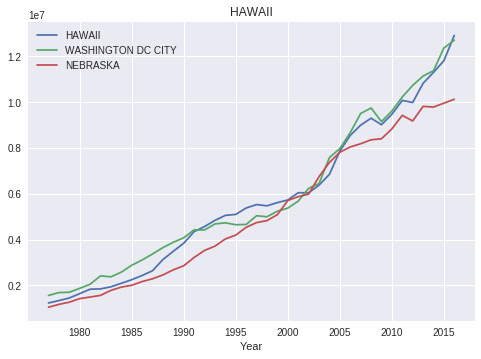

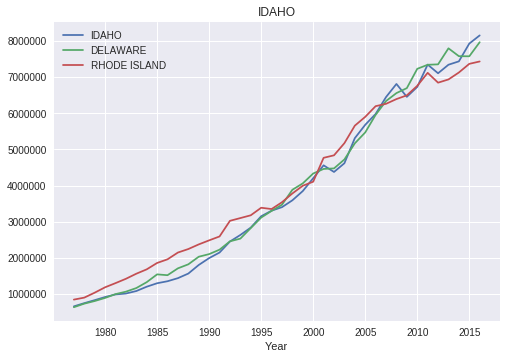

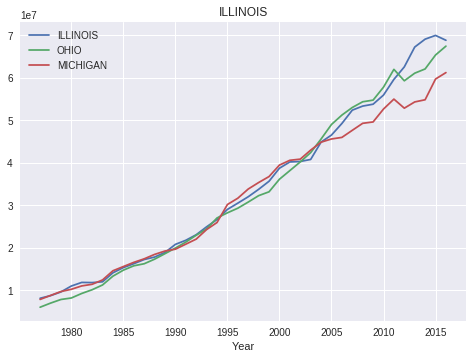

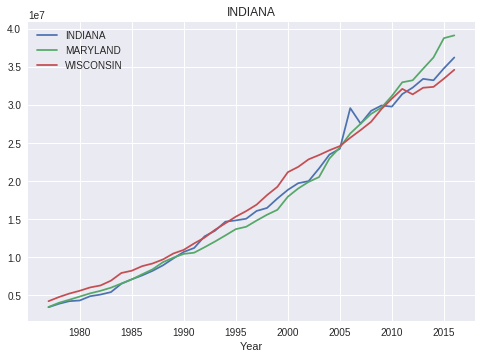

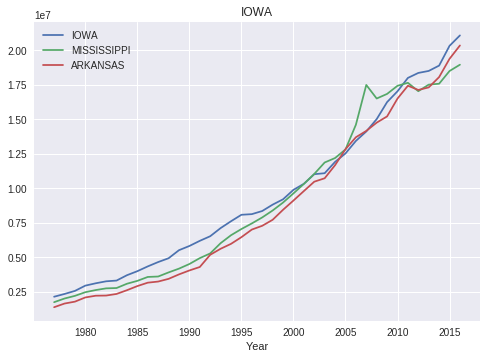

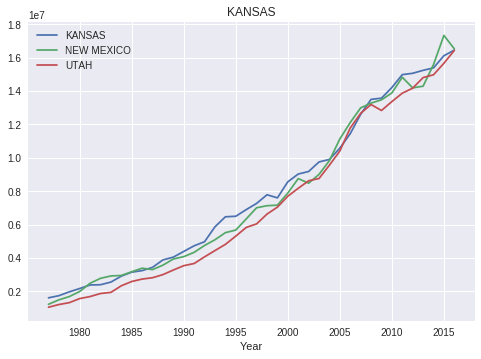

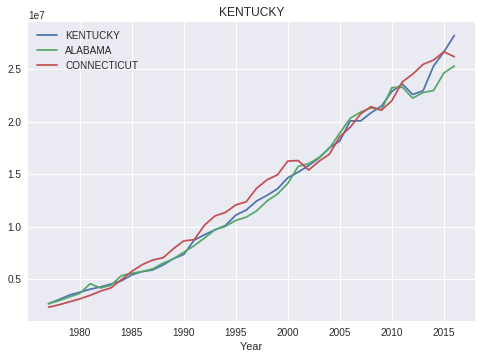

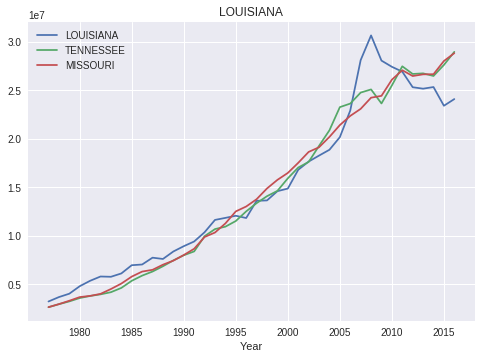

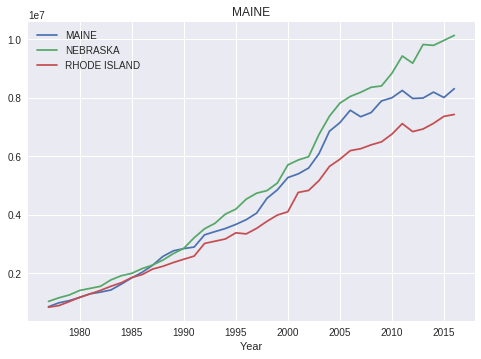

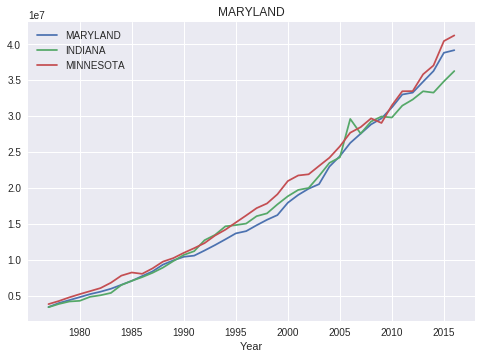

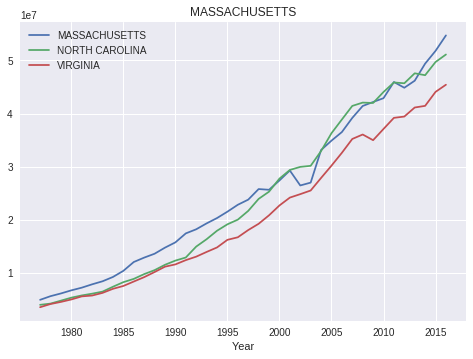

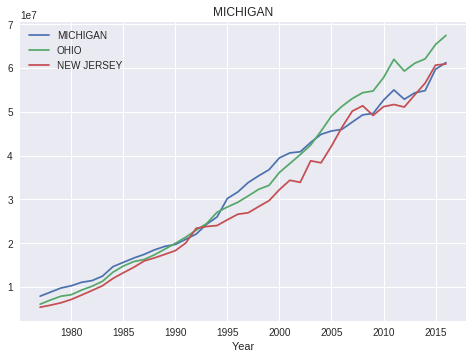

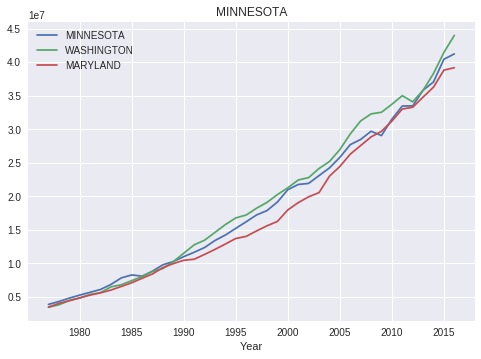

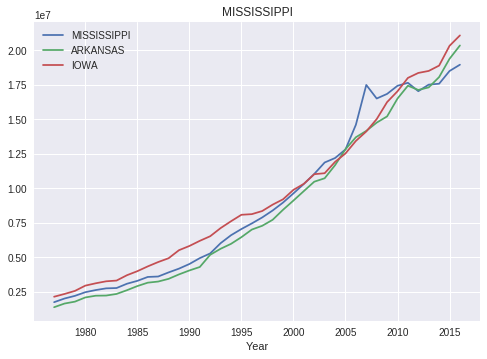

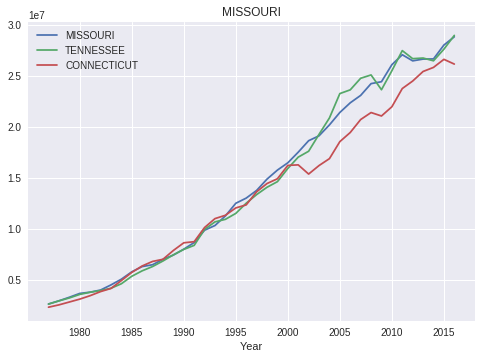

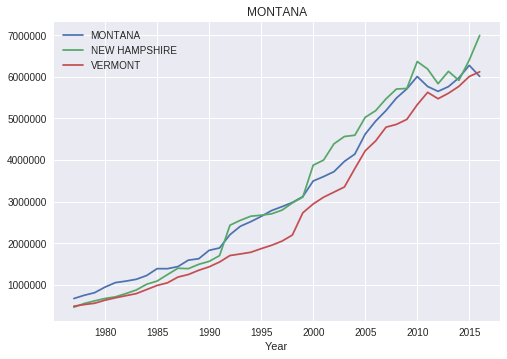

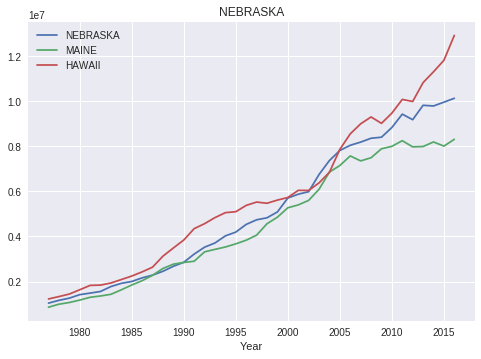

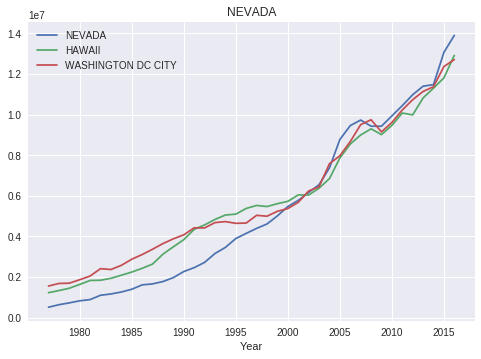

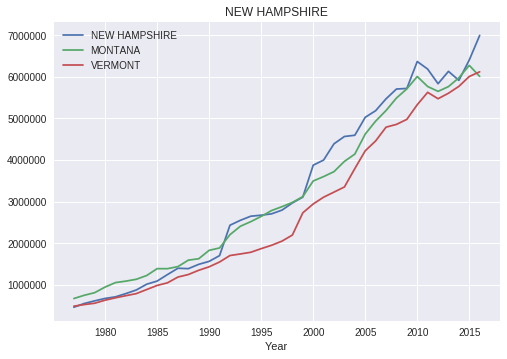

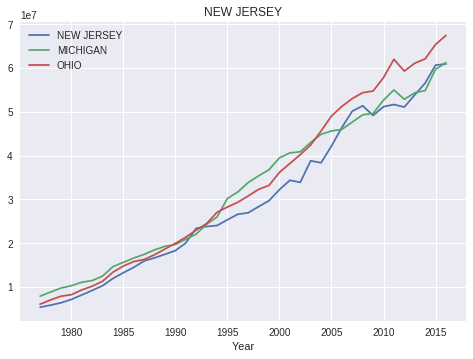

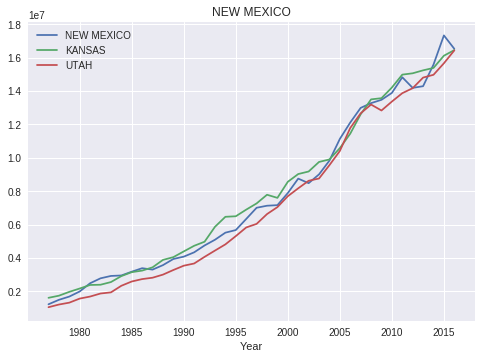

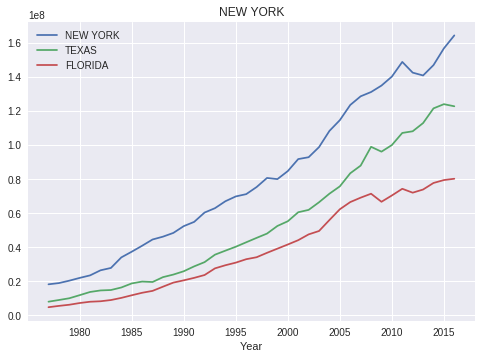

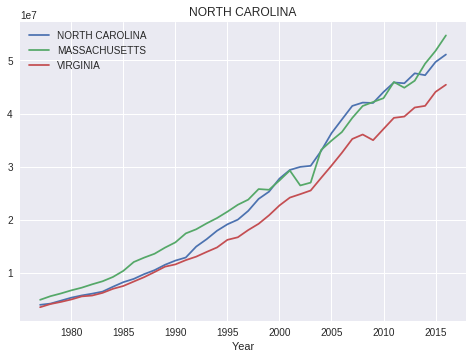

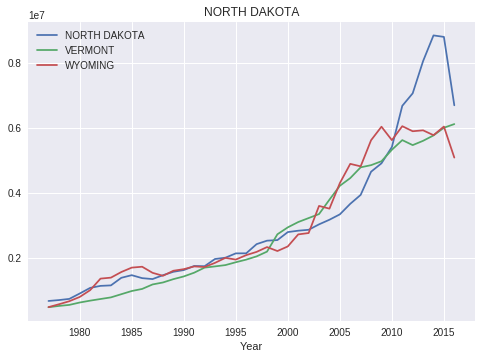

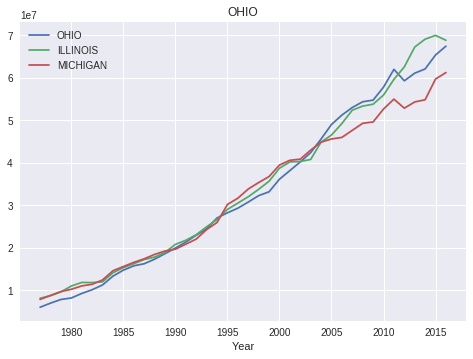

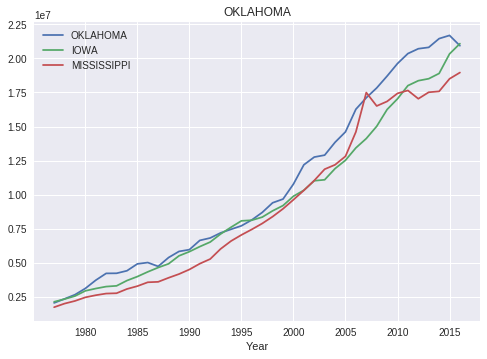

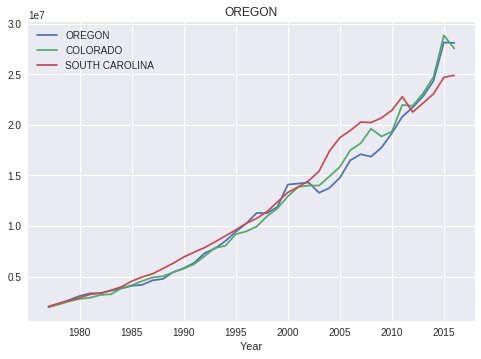

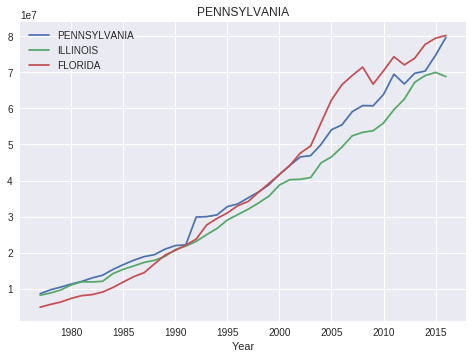

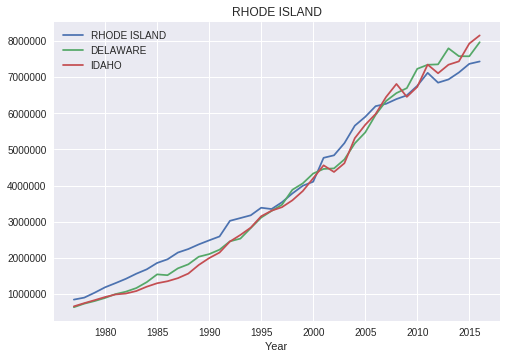

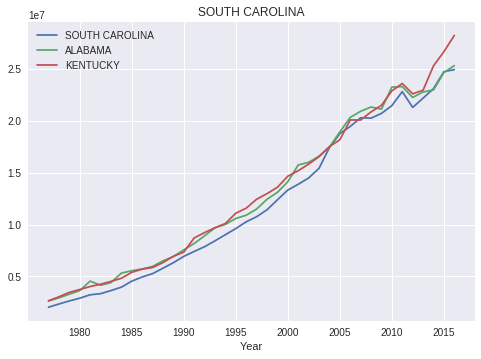

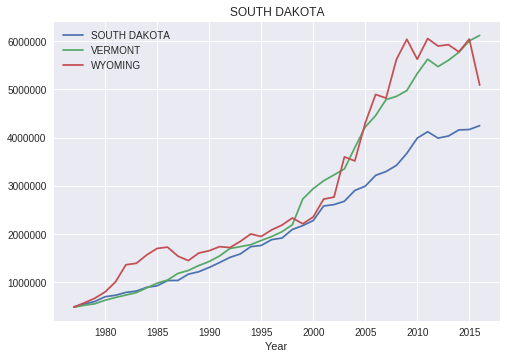

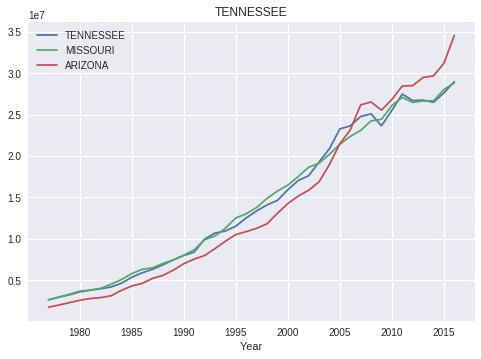

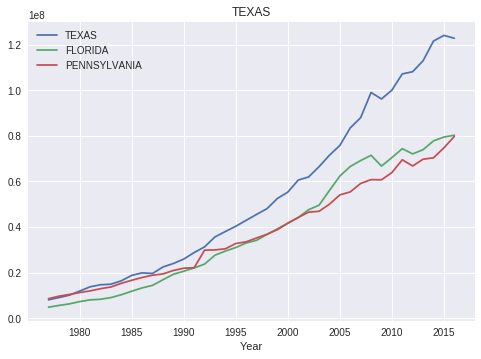

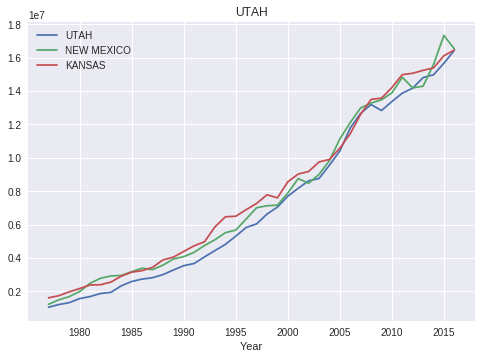

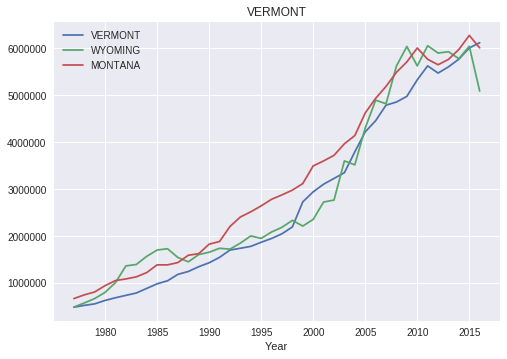

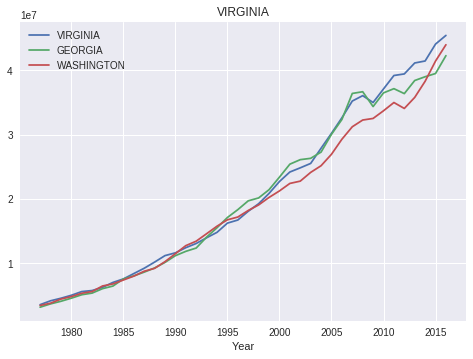

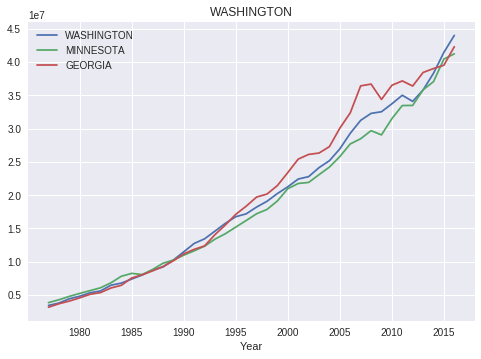

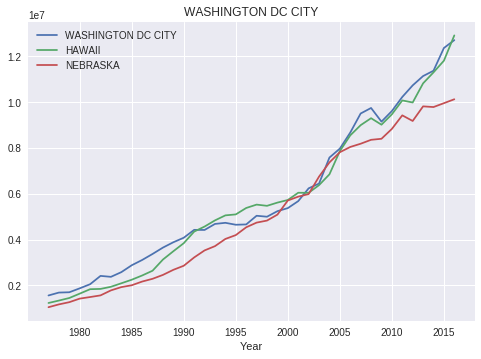

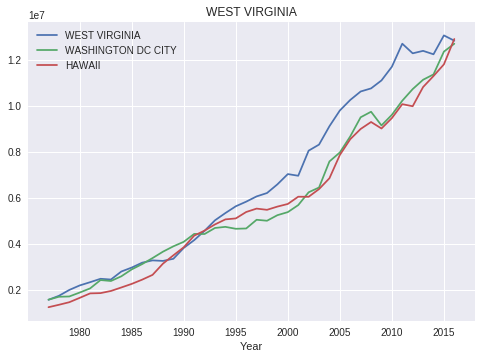

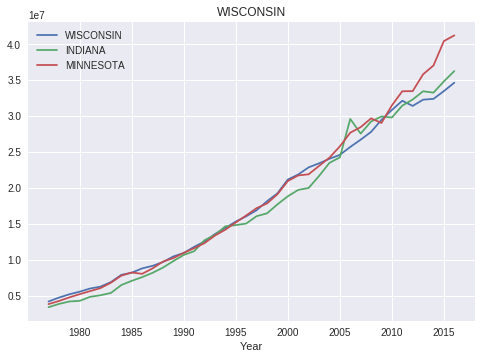

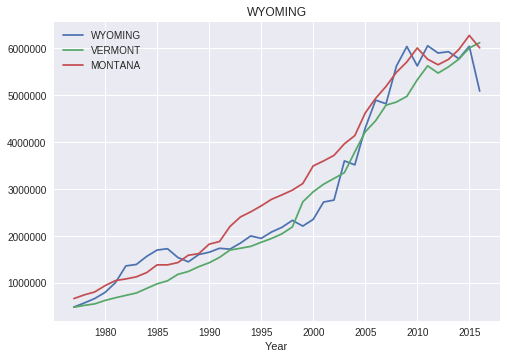

In [0]:
for row in indices:
  plt.title(pivoted.index[row[0]])
  for col in row:
    pivoted.iloc[col].plot()
  plt.legend(pivoted.iloc[list(row)].index.tolist())
  plt.show()

In [0]:
def getNearest(df, num):  
  nbrs = NearestNeighbors(n_neighbors=num, algorithm='auto').fit(df)
  distances, indices = nbrs.kneighbors(df)
  
  return indices

In [0]:
def getSimilarStates_multi(state, attributes, year, num=1):
  df = data[data['Year']==year][['State'] + attributes]
  df = df.set_index('State')
  indices = getNearest(df, num+1)
  id_ = df.index.tolist().index(state)
  
  neighbors = indices[id_]
  return df.index[neighbors].tolist()

In [0]:
def getSimilarStates(state, attribute, num=1):
  df = data[['Year', 'State'] + [attribute]]
  pivoted = df.pivot_table(index='State', columns='Year', values=attribute)
  pivoted = pivoted.sort_index()
  indices = getNearest(pivoted, num+1)
  id_ = pivoted.index.tolist().index(state)
  
  neighbors = indices[id_]
  return pivoted.index[neighbors].tolist()

In [0]:
def plotting(states, attribute):
  for state in states:
    plt.plot(data['Year'].drop_duplicates(), data[data['State']==state][attribute])
#   plt.title(states[0])
  plt.legend(states)
  plt.xlabel('Year')
  plt.ylabel(attribute)
  plt.show()

### Finding similarity based on time series for a particular attribute

In [0]:
attribute = 'General_Revenue'
# attribute = 'Population'

state = 'ARIZONA'

similar_states = getSimilarStates(state, attribute, 2)
print('States similar to', state, 'with respect to', attribute, 'are', similar_states[1:])

States similar to ARIZONA with respect to General_Revenue are ['TENNESSEE', 'MISSOURI']


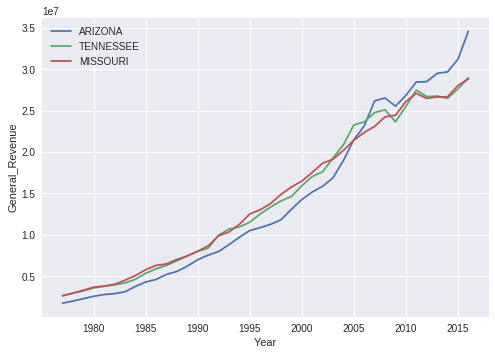

In [0]:
plotting(similar_states, attribute)

### Finding similarity for single year

In [0]:
keyword = 'health'

attributes_ = [key for key in keys if keyword in key.lower()]
attributes_

['Fed_IGR_Health___Hos',
 'Local_IGR_Health___Hos',
 'Health_Total_Expend',
 'Health_Direct_Expend',
 'Health_Capital_Outlay',
 'Health_Current_Exp',
 'Health_Construction',
 'Health_IG_Local_Govts']

In [0]:
state = 'ARIZONA'
# state = 'COLORADO'
# state = 'HAWAII'
# state = 'WASHINGTON'
# state = 'ALABAMA'

similar_states = getSimilarStates_multi(state, attributes_, 2016)
similar_states

['ARIZONA', 'OHIO']

In [0]:
data[(data['Year']==2016) & (data['State'].isin(similar_states))][attributes_]

,Fed_IGR_Health___Hos,Local_IGR_Health___Hos,Health_Total_Expend,Health_Direct_Expend,Health_Capital_Outlay,Health_Current_Exp,Health_Construction,Health_IG_Local_Govts
0,250736,21270,517728,421490,6724,414766,803,96238
23,266528,0,529725,418495,1067,417428,75,111230


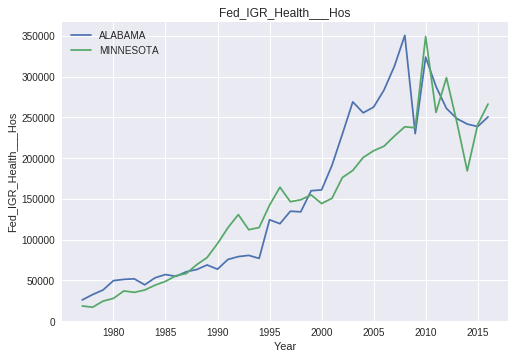

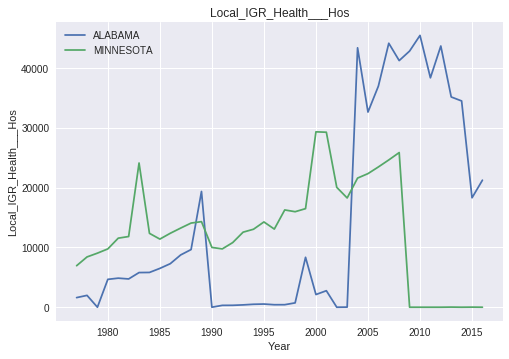

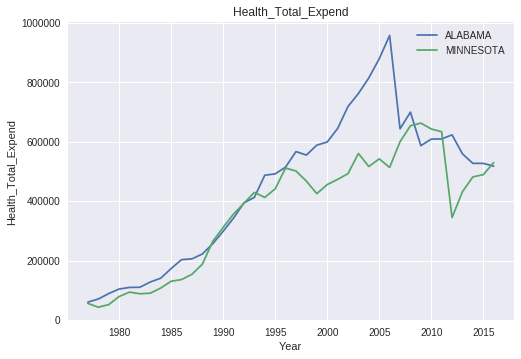

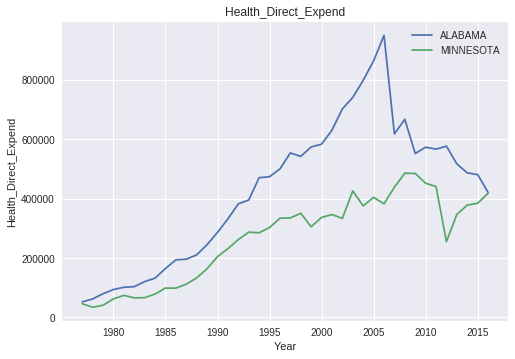

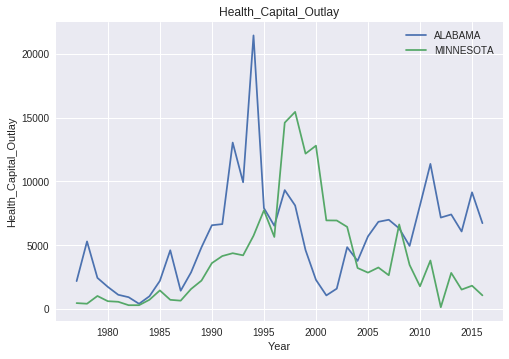

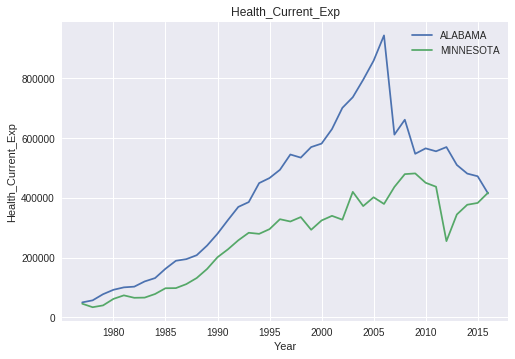

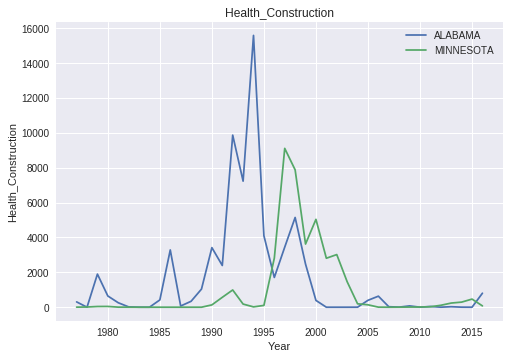

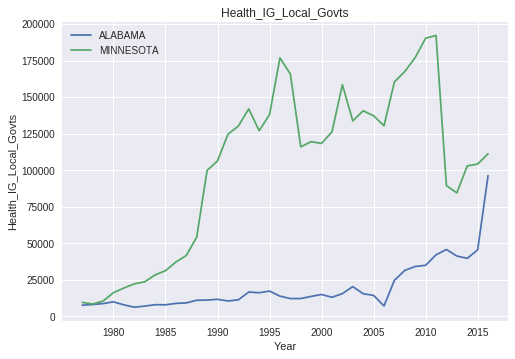

In [0]:
for att in attributes_:
  plt.title(att)
  plotting(similar_states, att)

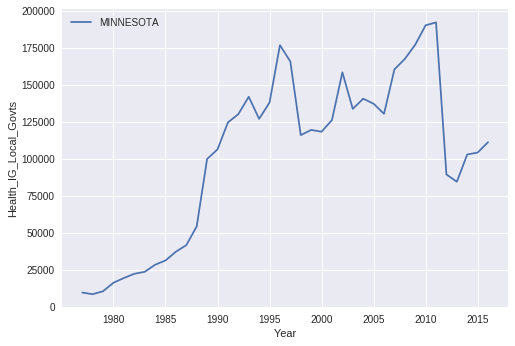

In [0]:
plotting([similar_states[1]], 'Health_IG_Local_Govts')